In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score,plot_roc_curve

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


### Loaded Data from drive

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset.csv")
#df = df.sample(frac = 0.2)
print(df.shape)

(26880, 57)


In [4]:
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
0,0,inf,1.968445,3.781433,6.967726,25.003789,-0.108340,9.035341,51.268785,-1.305514,-1.687820,-0.956327,0.706124,0.520655,1.024104,-0.263459,-0.406330,-0.057951,745.026347,0.518683,2.294020,0.042752,323.753715,58.869597,10.025391,0.000132,0.000726,32.293374,5.500232,6.938894e-17,-0.687823,0.631825,33.304875,8.366145,71.104794,283044.154576,13578.744515,980934.785078,8.847090e-17,-0.053753,0.060647,6.599142,1.715184,16.641077,10907.472894,570.720542,53723.729504,57084.052005,1073.243804,346297.112134,2.565184e+06,71368.302580,9.361319e+06,7.91,6.15,6.67,7.63
1,1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,7.91,6.15,6.67,7.63
2,2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,7.91,6.15,6.67,7.63
3,3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,7.91,6.15,6.67,7.63
4,4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,7.91,6.15,6.67,7.63


## Removing the infinite values from the dataset

In [5]:
df.shape

(26880, 57)

In [6]:
df = df.replace([np.inf, -np.inf], np.nan)
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
0,0,NaN,1.968445,3.781433,6.967726,25.003789,-0.108340,9.035341,51.268785,-1.305514,-1.687820,-0.956327,0.706124,0.520655,1.024104,-0.263459,-0.406330,-0.057951,745.026347,0.518683,2.294020,0.042752,323.753715,58.869597,10.025391,0.000132,0.000726,32.293374,5.500232,6.938894e-17,-0.687823,0.631825,33.304875,8.366145,71.104794,283044.154576,13578.744515,980934.785078,8.847090e-17,-0.053753,0.060647,6.599142,1.715184,16.641077,10907.472894,570.720542,53723.729504,57084.052005,1073.243804,346297.112134,2.565184e+06,71368.302580,9.361319e+06,7.91,6.15,6.67,7.63
1,1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,7.91,6.15,6.67,7.63
2,2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,7.91,6.15,6.67,7.63
3,3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,7.91,6.15,6.67,7.63
4,4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,7.91,6.15,6.67,7.63


In [7]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["coeff_var"], how="all")
df.shape

(26136, 57)

In [8]:
df.isnull().values.any()

False

In [9]:
df['dominance']

1        6.67
2        6.67
3        6.67
4        6.67
5        6.67
         ... 
26875    6.17
26876    6.17
26877    6.17
26878    6.17
26879    6.17
Name: dominance, Length: 26136, dtype: float64

# Changing the output labels to Categorical type

### We have divided into only into two classes with a threshold of 4.5.
### We can divide into thress classes or change threshold , could be our hyperparameter and we can tune to get better results

In [10]:
df['dominance'] = np.where(df['dominance']<=4 , 0, df['dominance'])
df['dominance'] = np.where(df['dominance']>4 , 1, df['dominance'])
df['valence'] = np.where(df['valence']<=4 , 0, df['valence'])
df['valence'] = np.where(df['valence']>4 , 1, df['valence'])
df['arousal'] = np.where(df['arousal']<=4 , 0, df['arousal'])
df['arousal'] = np.where(df['arousal']>4 , 1, df['arousal'])
df['liking'] = np.where(df['liking']<=4 , 0, df['liking'])
df['liking'] = np.where(df['liking']>4 , 1, df['liking'])


In [11]:
df['dominance'].unique()

array([1., 0.])

In [12]:
# plot bar graph showing the distribution of anmomolous to non-anomolous transactions
count_classes = pd.value_counts(df['liking'], sort = True)
count_classes
# got  - 492 fraud trnasactions

1.0    19316
0.0     6820
Name: liking, dtype: int64

<BarContainer object of 2 artists>

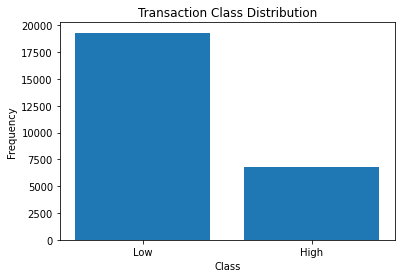

In [13]:
names = ["Low","High"]
values = count_classes
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.bar(names,values)

In [14]:
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
1,1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,1.0,1.0,1.0,1.0
2,2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,1.0,1.0,1.0,1.0
3,3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,1.0,1.0,1.0,1.0
4,4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,1.0,1.0,1.0,1.0
5,5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06,1.0,1.0,1.0,1.0


In [15]:
df.shape

(26136, 57)

## Choosing our X and Y

In [16]:
X = df.drop(['valence','liking','dominance','arousal'],axis = 1)
X.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
1,1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05
2,2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06
3,3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06
4,4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06
5,5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06


In [17]:
X = X.drop(['Unnamed: 0'],axis = 1)
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05
2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06
3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06
4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06
5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06


In [18]:
df = df.drop(["Unnamed: 0"],axis = 1)  # removing useless column
df.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
1,31.470278,1.991463,0.432901,5.592996,22.968215,-0.055265,6.667307,30.334462,-0.820227,-1.093286,-0.677683,0.681200,0.545709,0.786668,-0.451811,-0.520670,-0.358856,81.035466,1.029823,1.368585,0.012230,6.163244,6.414272,5.438296,0.001984,0.001907,1.133304,0.962771,-7.632783e-17,-0.276383,0.249098,10.050264,4.053766,21.302529,23679.107871,3188.659943,88042.307122,2.775558e-17,-0.125658,0.125793,6.025647,1.481712,14.104042,8825.982527,425.924572,38594.328486,44354.022752,657.046964,234535.787329,1.419112e+05,11121.458729,6.116816e+05,1.0,1.0,1.0,1.0
2,19.529628,1.976255,3.332013,8.107184,32.997660,-0.069080,10.004487,48.011861,-0.929285,-1.183185,-0.678770,0.598034,0.557351,0.679021,-0.419949,-0.503502,-0.271222,354.071013,0.822597,1.723960,0.075380,154.079236,38.690783,12.427970,0.000489,0.001948,12.397780,3.984272,6.591949e-17,-0.932249,0.639136,21.392417,5.177415,49.349128,116554.220064,5203.318871,472623.875936,2.862294e-17,-0.080576,0.051940,9.032314,1.935283,21.769494,20163.751008,726.648063,91938.899963,120331.356060,1520.066889,646316.999935,9.651501e+05,21279.958490,4.428053e+06,1.0,1.0,1.0,1.0
3,-264.756022,1.976850,1.110048,7.147637,27.668287,0.001296,8.228460,41.145394,-1.024669,-1.143710,-0.657023,0.747363,0.571420,0.851203,-0.424781,-0.490500,-0.341390,192.151255,0.861632,1.545466,0.008093,24.513178,18.048578,9.026877,0.000330,0.000448,2.715577,1.358626,8.673617e-19,-0.203844,0.448360,15.937927,4.587929,42.385056,63049.688281,4085.329943,348522.602868,5.117434e-17,-0.047537,0.057868,6.634752,1.592896,17.773637,11083.422285,492.241723,61285.321702,58421.651690,870.539195,398048.741443,4.579790e+05,15298.653872,2.997092e+06,1.0,1.0,1.0,1.0
4,114.478809,1.990312,0.095283,7.594185,31.702997,0.000729,8.808061,35.936629,-0.740112,-1.034733,-0.574626,0.664725,0.598629,0.727446,-0.440610,-0.548750,-0.326801,122.969656,1.099910,1.299955,0.005899,8.338150,4.162958,10.103041,0.000707,0.001417,0.825311,2.004355,-3.122502e-17,-0.434054,0.270859,12.029804,3.667337,27.262840,34277.552192,2609.211538,144199.450436,-8.153200e-17,-0.109911,0.100516,7.351877,1.565114,18.116989,13570.654539,475.220230,63678.052677,73485.563795,735.235764,413764.096723,2.154789e+05,8574.683607,1.044829e+06,1.0,1.0,1.0,1.0
5,21.068922,1.978037,4.438428,5.931410,28.607774,-0.042457,7.590096,47.573406,-1.224950,-1.533386,-0.815867,0.683165,0.593045,0.773488,-0.242990,-0.408387,-0.044327,374.320370,0.632694,1.956614,0.040687,140.404364,39.567139,12.284715,0.000290,0.001028,11.429192,3.549538,-1.387779e-17,-0.941164,0.652005,23.119072,5.681090,51.873429,137232.934577,6263.740351,522041.292553,-5.204170e-18,-0.040246,0.058274,5.439941,1.609547,12.816591,7224.609816,502.593097,31867.747248,35059.744416,800.645468,186025.445662,1.165839e+06,28539.765305,5.024418e+06,1.0,1.0,1.0,1.0


In [19]:
# Y consists of all 4 labels while small y consists of only one output label
Y = df[['valence','arousal','liking','dominance']]
Y.head()

,valence,arousal,liking,dominance
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [20]:
y = df['liking']
y[0:5]

1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: liking, dtype: float64

In [21]:
# converting y to np array and flattening using ravel
y = np.array(y)
y = y.ravel()
y[0:5]

array([1., 1., 1., 1., 1.])

In [22]:
print(X.shape)
print(y.shape)

(26136, 52)
(26136,)


# Normalizing X



In [23]:
columns = X.columns.tolist()
columns

['coeff_var',
 'fractal_dimension',
 'kurtosis',
 'secDiffMean',
 'secDiffMax',
 'skewness',
 'first_diff_mean',
 'first_diff_max',
 'AR1_mean',
 'AR1_min',
 'AR1_max',
 'AR2_mean',
 'AR2_min',
 'AR2_max',
 'AR3_mean',
 'AR3_min',
 'AR3_max',
 'hjorth_activity',
 'hjorth_mobility',
 'hjorth_complexity',
 'PMax1',
 'PMax2',
 'PMax3',
 'PMax4',
 'PRatio1',
 'PRatio2',
 'PRatio3',
 'PRatio4',
 'cA_mean_mean',
 'cA_mean_min',
 'cA_mean_max',
 'cA_std_mean',
 'cA_std_min',
 'cA_std_max',
 'cA_Energy_mean',
 'cA_Energy_min',
 'cA_Energy_max',
 'cD_mean_mean',
 'cD_mean_min',
 'cD_mean_max',
 'cD_std_mean',
 'cD_std_min',
 'cD_std_max',
 'cD_Energy_mean',
 'cD_Energy_min',
 'cD_Energy_max',
 'Entropy_D_mean',
 'Entropy_D_min',
 'Entropy_D_max',
 'Entropy_A_mean',
 'Entropy_A_min',
 'Entropy_A_max']

In [24]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(np.array(X))

In [25]:
# Normalized dataframe
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.554409,0.954185,0.030077,0.037794,0.120741,0.485496,0.036127,0.024935,0.724688,0.687414,0.659533,0.254760,0.445797,0.204301,0.269042,0.342121,0.255645,0.000909,0.692956,0.145995,0.000195,0.000140,0.000595,0.002380,0.019768,0.003349,0.002076,0.008586,0.484848,0.992746,0.004273,0.018292,0.044101,0.023490,0.000686,0.006097,0.000866,0.531128,0.916412,0.044543,0.039008,0.026032,0.043098,0.002438,0.001863,0.002341,0.001146,0.000481,0.001183,0.000326,0.002930,0.000425
1,0.554409,0.872567,0.129534,0.060582,0.131236,0.475193,0.061065,0.044126,0.665895,0.637721,0.658954,0.189497,0.455001,0.129240,0.314959,0.368339,0.383652,0.004337,0.497850,0.335798,0.001236,0.003969,0.004046,0.005868,0.004805,0.003425,0.023577,0.037501,0.507856,0.973665,0.011974,0.051844,0.071469,0.063572,0.003761,0.011651,0.004859,0.531278,0.947279,0.017301,0.063816,0.041504,0.069742,0.005696,0.003582,0.005624,0.003131,0.001114,0.003268,0.002370,0.006323,0.003160
2,0.554409,0.875760,0.053308,0.051885,0.125660,0.527679,0.047793,0.036672,0.614474,0.659541,0.670539,0.306680,0.466124,0.249301,0.307996,0.388196,0.281158,0.002304,0.534602,0.240465,0.000127,0.000615,0.001839,0.004171,0.003213,0.000694,0.005096,0.012374,0.497334,0.994857,0.008207,0.035709,0.057111,0.053619,0.001990,0.008569,0.003571,0.535169,0.969899,0.019488,0.044034,0.029825,0.055853,0.003087,0.002242,0.003737,0.001514,0.000637,0.002011,0.001111,0.004325,0.002134
3,0.554409,0.948008,0.018495,0.055933,0.129882,0.527256,0.052124,0.031017,0.767878,0.719781,0.714437,0.241831,0.487635,0.163006,0.285184,0.299236,0.302467,0.001435,0.758943,0.109339,0.000091,0.000196,0.000354,0.004708,0.006989,0.002458,0.001488,0.018553,0.492144,0.988159,0.004702,0.024148,0.034689,0.032008,0.001037,0.004500,0.001449,0.512272,0.927194,0.035219,0.049951,0.028877,0.057046,0.003802,0.002144,0.003884,0.001907,0.000538,0.002090,0.000509,0.002080,0.000736
4,0.554409,0.882132,0.167490,0.040862,0.126643,0.495048,0.043023,0.043650,0.506503,0.444139,0.585915,0.256302,0.483220,0.195111,0.569984,0.513598,0.715080,0.004591,0.319054,0.460057,0.000664,0.003615,0.004140,0.005796,0.002809,0.001750,0.021728,0.033340,0.494949,0.973406,0.012228,0.056952,0.083737,0.067179,0.004446,0.014574,0.005372,0.525441,0.974891,0.019637,0.034175,0.030393,0.038623,0.001978,0.002301,0.001927,0.000904,0.000586,0.000937,0.002868,0.008747,0.003587


In [26]:
X_norm.columns = columns
X_norm.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.554409,0.954185,0.030077,0.037794,0.120741,0.485496,0.036127,0.024935,0.724688,0.687414,0.659533,0.254760,0.445797,0.204301,0.269042,0.342121,0.255645,0.000909,0.692956,0.145995,0.000195,0.000140,0.000595,0.002380,0.019768,0.003349,0.002076,0.008586,0.484848,0.992746,0.004273,0.018292,0.044101,0.023490,0.000686,0.006097,0.000866,0.531128,0.916412,0.044543,0.039008,0.026032,0.043098,0.002438,0.001863,0.002341,0.001146,0.000481,0.001183,0.000326,0.002930,0.000425
1,0.554409,0.872567,0.129534,0.060582,0.131236,0.475193,0.061065,0.044126,0.665895,0.637721,0.658954,0.189497,0.455001,0.129240,0.314959,0.368339,0.383652,0.004337,0.497850,0.335798,0.001236,0.003969,0.004046,0.005868,0.004805,0.003425,0.023577,0.037501,0.507856,0.973665,0.011974,0.051844,0.071469,0.063572,0.003761,0.011651,0.004859,0.531278,0.947279,0.017301,0.063816,0.041504,0.069742,0.005696,0.003582,0.005624,0.003131,0.001114,0.003268,0.002370,0.006323,0.003160
2,0.554409,0.875760,0.053308,0.051885,0.125660,0.527679,0.047793,0.036672,0.614474,0.659541,0.670539,0.306680,0.466124,0.249301,0.307996,0.388196,0.281158,0.002304,0.534602,0.240465,0.000127,0.000615,0.001839,0.004171,0.003213,0.000694,0.005096,0.012374,0.497334,0.994857,0.008207,0.035709,0.057111,0.053619,0.001990,0.008569,0.003571,0.535169,0.969899,0.019488,0.044034,0.029825,0.055853,0.003087,0.002242,0.003737,0.001514,0.000637,0.002011,0.001111,0.004325,0.002134
3,0.554409,0.948008,0.018495,0.055933,0.129882,0.527256,0.052124,0.031017,0.767878,0.719781,0.714437,0.241831,0.487635,0.163006,0.285184,0.299236,0.302467,0.001435,0.758943,0.109339,0.000091,0.000196,0.000354,0.004708,0.006989,0.002458,0.001488,0.018553,0.492144,0.988159,0.004702,0.024148,0.034689,0.032008,0.001037,0.004500,0.001449,0.512272,0.927194,0.035219,0.049951,0.028877,0.057046,0.003802,0.002144,0.003884,0.001907,0.000538,0.002090,0.000509,0.002080,0.000736
4,0.554409,0.882132,0.167490,0.040862,0.126643,0.495048,0.043023,0.043650,0.506503,0.444139,0.585915,0.256302,0.483220,0.195111,0.569984,0.513598,0.715080,0.004591,0.319054,0.460057,0.000664,0.003615,0.004140,0.005796,0.002809,0.001750,0.021728,0.033340,0.494949,0.973406,0.012228,0.056952,0.083737,0.067179,0.004446,0.014574,0.005372,0.525441,0.974891,0.019637,0.034175,0.030393,0.038623,0.001978,0.002301,0.001927,0.000904,0.000586,0.000937,0.002868,0.008747,0.003587


In [27]:
X = X_norm
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.554409,0.954185,0.030077,0.037794,0.120741,0.485496,0.036127,0.024935,0.724688,0.687414,0.659533,0.254760,0.445797,0.204301,0.269042,0.342121,0.255645,0.000909,0.692956,0.145995,0.000195,0.000140,0.000595,0.002380,0.019768,0.003349,0.002076,0.008586,0.484848,0.992746,0.004273,0.018292,0.044101,0.023490,0.000686,0.006097,0.000866,0.531128,0.916412,0.044543,0.039008,0.026032,0.043098,0.002438,0.001863,0.002341,0.001146,0.000481,0.001183,0.000326,0.002930,0.000425
1,0.554409,0.872567,0.129534,0.060582,0.131236,0.475193,0.061065,0.044126,0.665895,0.637721,0.658954,0.189497,0.455001,0.129240,0.314959,0.368339,0.383652,0.004337,0.497850,0.335798,0.001236,0.003969,0.004046,0.005868,0.004805,0.003425,0.023577,0.037501,0.507856,0.973665,0.011974,0.051844,0.071469,0.063572,0.003761,0.011651,0.004859,0.531278,0.947279,0.017301,0.063816,0.041504,0.069742,0.005696,0.003582,0.005624,0.003131,0.001114,0.003268,0.002370,0.006323,0.003160
2,0.554409,0.875760,0.053308,0.051885,0.125660,0.527679,0.047793,0.036672,0.614474,0.659541,0.670539,0.306680,0.466124,0.249301,0.307996,0.388196,0.281158,0.002304,0.534602,0.240465,0.000127,0.000615,0.001839,0.004171,0.003213,0.000694,0.005096,0.012374,0.497334,0.994857,0.008207,0.035709,0.057111,0.053619,0.001990,0.008569,0.003571,0.535169,0.969899,0.019488,0.044034,0.029825,0.055853,0.003087,0.002242,0.003737,0.001514,0.000637,0.002011,0.001111,0.004325,0.002134
3,0.554409,0.948008,0.018495,0.055933,0.129882,0.527256,0.052124,0.031017,0.767878,0.719781,0.714437,0.241831,0.487635,0.163006,0.285184,0.299236,0.302467,0.001435,0.758943,0.109339,0.000091,0.000196,0.000354,0.004708,0.006989,0.002458,0.001488,0.018553,0.492144,0.988159,0.004702,0.024148,0.034689,0.032008,0.001037,0.004500,0.001449,0.512272,0.927194,0.035219,0.049951,0.028877,0.057046,0.003802,0.002144,0.003884,0.001907,0.000538,0.002090,0.000509,0.002080,0.000736
4,0.554409,0.882132,0.167490,0.040862,0.126643,0.495048,0.043023,0.043650,0.506503,0.444139,0.585915,0.256302,0.483220,0.195111,0.569984,0.513598,0.715080,0.004591,0.319054,0.460057,0.000664,0.003615,0.004140,0.005796,0.002809,0.001750,0.021728,0.033340,0.494949,0.973406,0.012228,0.056952,0.083737,0.067179,0.004446,0.014574,0.005372,0.525441,0.974891,0.019637,0.034175,0.030393,0.038623,0.001978,0.002301,0.001927,0.000904,0.000586,0.000937,0.002868,0.008747,0.003587


# For generating dataframe with specific input columns

### This would be useful when we train our model for reduced features

In [28]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

# Trying Different Algorithms

In [29]:
from sklearn.model_selection import train_test_split

## 1. Stacked ensemble


In [100]:
# stack ensembe
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


def get_stacking():
  level0 = list()
  #level0.append(('lr', LogisticRegression(max_iter=100)))
  level0.append(('rf',RandomForestClassifier()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('bayes', GaussianNB()))
  level0.append(('svm', SVC()))

  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return  model

def run_model(X,y):
        print(X.shape,y.shape)
        from sklearn.ensemble import StackingClassifier
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.linear_model import LogisticRegression
        
        model = get_stacking()

        #model = StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)

(26136, 52) (26136,)
Accuracy 0.7580289855072464
              precision    recall  f1-score   support

         0.0       0.61      0.19      0.29      2241
         1.0       0.77      0.96      0.85      6384

    accuracy                           0.76      8625
   macro avg       0.69      0.57      0.57      8625
weighted avg       0.73      0.76      0.71      8625

ROC_AUC_score : 0.573599


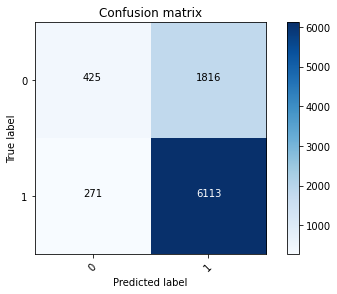

In [101]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

## 2. Random Forest

In [30]:

def run_model(X,y):
        print(X.shape,y.shape)
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier()
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)


(26136, 52) (26136,)
Accuracy 0.7558260869565218
              precision    recall  f1-score   support

         0.0       0.61      0.16      0.26      2241
         1.0       0.77      0.96      0.85      6384

    accuracy                           0.76      8625
   macro avg       0.69      0.56      0.56      8625
weighted avg       0.73      0.76      0.70      8625

ROC_AUC_score : 0.563713


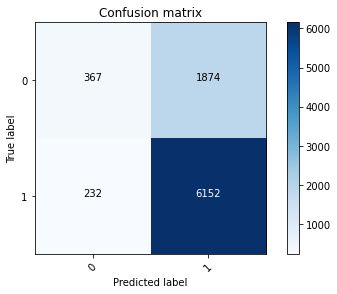

In [68]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

## Hyperparameter tuning using GridSearchCV -  Random Forest

In [ ]:
# hyperparamete tuning
def run_model(X,y):
        print(X.shape,y.shape)

        n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
        max_features = ['auto', 'sqrt']
        max_depth = [2,4]
        min_samples_split = [2, 5]
        min_samples_leaf = [1, 2]
        bootstrap = [True, False]

       # Create the param grid
        param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
        print(param_grid)



        from sklearn.ensemble import RandomForestClassifier
        rf_Model  = RandomForestClassifier()
        
        from sklearn.model_selection import GridSearchCV
        rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        rf_Grid.fit(X_train,y_train)
        print(rf_Grid.best_params_)
        y_pred = rf_Grid.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)

In [ ]:
# tuned

(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

# Best Parameters : {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}

## XGBoost

In [66]:

def run_model(X,y):
        print(X.shape,y.shape)
        from xgboost import XGBClassifier           
        model = XGBClassifier(learning_rate = 0.05,max_depth = 15,min_child_weight = 15,gamma = 0.1,colsample_bytre = 0.2)
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)


(26136, 52) (26136,)
Accuracy 0.7558260869565218
              precision    recall  f1-score   support

         0.0       0.61      0.16      0.26      2241
         1.0       0.77      0.96      0.85      6384

    accuracy                           0.76      8625
   macro avg       0.69      0.56      0.56      8625
weighted avg       0.73      0.76      0.70      8625

ROC_AUC_score : 0.563713


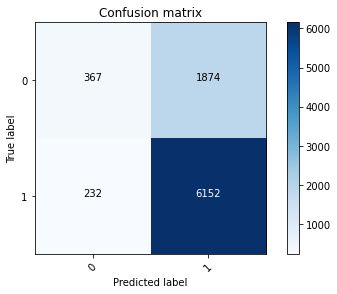

In [67]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

## Hyperparameter tuning using GridSearchCV -  XGBoost

In [ ]:
# hyperparamete tuning
def run_model(X,y):
        print(X.shape,y.shape)

        learning_rate =  [0.05, 0.10, 0.25,]
        max_depth        = [ 3,6,10,15]
        min_child_weight = [ 1, 3, 5, 7 ]
        gamma           = [ 0.0, 0.1, 0.25,0.45 ]
        colsample_bytre = [ 0.3, 0.45,0.60]

       # Create the param grid

        param_grid = {'learning_rate': learning_rate,
               'min_child_weight': min_child_weight,
               'max_depth': max_depth,
               'gamma': gamma,
               'colsample_bytre': colsample_bytre}
        print(param_grid)

        from xgboost import XGBClassifier
        rf_Model = XGBClassifier()
        
        from sklearn.model_selection import GridSearchCV
        rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        rf_Grid.fit(X_train,y_train)
        print(rf_Grid.best_params_)
        y_pred = rf_Grid.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)

In [ ]:
# tuned

(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

# best paarms - learning_rate = 0.05,max_depth = 15,min_child_weight = 15,gamma = 0.1,colsample_bytre = 0.2

(5214, 52) (5214,)
{'learning_rate': [0.05, 0.1, 0.25], 'min_child_weight': [1, 3, 5, 7], 'max_depth': [3, 6, 10, 15], 'gamma': [0.0, 0.1, 0.25, 0.45], 'colsample_bytre': [0.3, 0.45, 0.6]}
Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


## 4. Gradient Boosting

In [ ]:

def run_model(X,y):
        print(X.shape,y.shape)
        from sklearn.ensemble import GradientBoostingClassifier          
        model = GradientBoostingClassifier()
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)


'\ndef run_model(X,y):\n        print(X.shape,y.shape)\n        from sklearn.ensemble import GradientBoostingClassifier          \n        model = GradientBoostingClassifier()\n        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)\n        model.fit(X_train,y_train)\n        y_pred = model.predict(X_test)\n        #cm = 1\n        #print(y_train.shape,y_pred.shape)\n        cm = confusion_matrix(y_test, y_pred)\n        accuracy = accuracy_score(y_test,y_pred)\n        print("Accuracy" , accuracy)\n        plot_confusion_matrix(cm,classes)\n        print(classification_report(y_test,y_pred))\n        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))\n        return (y_test,y_pred)\n'

In [ ]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

# Confusion Matrix Plot

In [32]:
import itertools
classes = np.array(['0','1'])
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = np.array(['0','1'])

    

## Best Model  -  Both Random Forest and XGBoost performed similar

In [36]:
predicts = {}
test = {}

In [54]:
def run_model(X,y):
        print(X.shape,y.shape)
        from sklearn.ensemble import RandomForestClassifier
        #'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10
        model = RandomForestClassifier(max_depth = 20,min_samples_leaf = 2,min_samples_split = 15)
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)

(26136, 52) (26136,)
Accuracy 0.7574492753623189
              precision    recall  f1-score   support

         0.0       0.67      0.13      0.22      2241
         1.0       0.76      0.98      0.86      6384

    accuracy                           0.76      8625
   macro avg       0.71      0.56      0.54      8625
weighted avg       0.74      0.76      0.69      8625

ROC_AUC_score : 0.555108


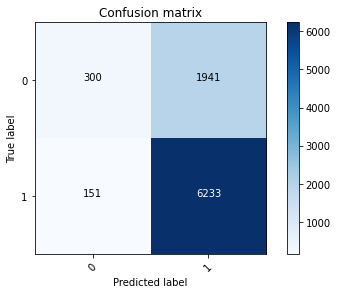

In [55]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

# before - 

In [ ]:
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.648985,0.810590,0.177740,0.084403,0.268060,0.485921,0.113546,0.186868,0.254861,0.269085,0.291067,0.305930,0.364020,0.562881,0.910533,0.738570,1.000000,0.061916,0.044957,0.763953,0.021268,0.063884,0.044640,0.006252,0.006735,0.007821,0.378967,0.085983,0.568946,0.960457,0.028739,0.244721,0.320360,0.288089,0.062670,0.129798,0.086440,0.473501,0.956833,0.042321,0.065046,0.115391,0.067614,0.005107,0.024993,0.005608,0.002797,0.010872,0.003647,0.050453,0.098827,0.071902
1,0.648985,0.795730,0.086297,0.060263,0.222256,0.489225,0.062248,0.050146,0.484571,0.440577,0.699559,0.265183,0.390238,0.240109,0.476193,0.447834,0.486126,0.007715,0.286077,0.614772,0.002581,0.004578,0.005436,0.002622,0.011761,0.007617,0.060158,0.049149,0.507822,0.991924,0.007485,0.069552,0.033816,0.124189,0.007560,0.005214,0.017250,0.580394,0.950508,0.065208,0.050463,0.068633,0.056600,0.003466,0.012025,0.004081,0.001626,0.004025,0.002150,0.004980,0.002545,0.012088
2,0.648985,0.872832,0.078086,0.032672,0.206133,0.470698,0.036221,0.038444,0.317969,0.339131,0.297376,0.445907,0.479841,0.500375,0.560481,0.441642,0.760094,0.006291,0.133074,0.761174,0.003826,0.008786,0.003496,0.002457,0.008978,0.017533,0.121814,0.145808,0.528679,0.982818,0.039286,0.065990,0.121569,0.089268,0.006337,0.028077,0.009343,0.677370,0.984333,0.019838,0.026712,0.048050,0.026605,0.001295,0.007542,0.001133,0.000525,0.002912,0.000506,0.003951,0.017622,0.006065
3,0.648985,0.758210,0.038893,0.026623,0.207241,0.521981,0.028279,0.019912,0.450530,0.430001,0.539493,0.363913,0.429178,0.418235,0.577335,0.654704,0.602742,0.002481,0.380269,0.316334,0.000517,0.001166,0.003223,0.003747,0.009116,0.002421,0.011336,0.020539,0.513326,0.925189,0.139910,0.022810,0.040849,0.122476,0.002334,0.006568,0.016906,0.594841,0.981813,0.182057,0.024577,0.021288,0.121996,0.002831,0.002837,0.016644,0.001757,0.000799,0.010686,0.001545,0.003275,0.011546
4,0.648985,0.723197,0.115652,0.067481,0.231729,0.500273,0.076196,0.081993,0.348974,0.299904,0.604720,0.325877,0.426108,0.360564,0.673267,0.402432,0.779268,0.022559,0.144494,0.730954,0.003638,0.009450,0.007412,0.004425,0.007875,0.007934,0.077462,0.075271,0.531866,0.925729,0.036249,0.124348,0.158121,0.259580,0.022709,0.041579,0.070626,0.576991,0.967608,0.101224,0.054577,0.096298,0.091534,0.004536,0.019231,0.009745,0.002339,0.006982,0.005788,0.017208,0.026791,0.057310


In [ ]:
df.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
12459,5.973015,1.969051,3.572844,7.161740,45.592646,-0.015406,11.333340,101.634232,-1.614558,-1.783390,-1.395372,0.735542,0.527917,1.199174,-0.020490,-0.306636,0.129708,3346.123194,0.350082,2.398419,0.533812,1500.208876,235.150599,11.216482,0.000356,0.002270,133.750391,6.382049,3.330669e-16,-1.399958,1.266448,71.223052,14.269388,175.467011,1.275446e+06,39518.186965,5.973314e+06,-5.915407e-16,-0.049089,0.049718,6.461947,2.211584,15.500296,9964.314019,948.875361,46610.747377,56620.183019,2313.260484,3.453909e+05,1.362153e+07,248189.283504,7.044920e+07,1.0,1.0,1.0,0.0
4335,-150.599590,1.966623,1.546177,5.531696,22.011124,-0.011608,7.041127,32.883446,-1.212249,-1.500416,-0.715832,0.696360,0.556321,0.829625,-0.315290,-0.466578,-0.192995,424.510496,0.602526,2.145656,0.065115,108.342225,29.428400,5.093591,0.000601,0.002213,21.270304,3.683766,-3.295975e-17,-0.318828,0.365962,23.009893,3.824883,78.517456,1.564776e+05,2838.686992,1.196008e+06,-3.642919e-17,-0.055534,0.073312,5.311727,1.637035,13.252949,6876.627431,519.958025,34074.840043,33128.904446,868.340728,2.039941e+05,1.354005e+06,9726.511616,1.186060e+07,1.0,0.0,1.0,1.0
22049,-81.739379,1.979221,1.364193,3.668647,13.710290,-0.032901,4.863430,26.999001,-1.504033,-1.667809,-1.384877,0.870142,0.653397,1.127609,-0.258081,-0.469984,-0.020948,347.763910,0.442337,2.393711,0.096356,207.109749,19.249126,4.813897,0.000465,0.005006,43.023299,10.764442,9.194034e-17,-0.631679,1.713321,22.029585,7.023463,57.861094,1.316355e+05,9569.921466,6.500633e+05,4.671827e-16,-0.021068,0.026542,3.438381,1.384110,7.132886,2790.492955,371.659635,9870.430747,11033.844337,633.620423,4.881086e+04,1.076248e+06,47068.175683,5.960961e+06,0.0,0.0,1.0,0.0
13657,4.478804,1.960492,0.495559,3.260149,14.280634,0.026038,4.198922,17.680308,-1.271867,-1.517866,-0.982107,0.791298,0.598509,1.033565,-0.246642,-0.352773,-0.119762,142.401066,0.701141,1.640000,0.013347,28.279648,17.816982,6.990960,0.000472,0.000749,4.045174,1.587979,0.000000e+00,-2.611729,5.976645,10.144586,4.081245,77.503968,5.037053e+04,3237.346565,1.172262e+06,3.859760e-17,-0.023636,0.193768,3.269973,1.055263,26.596125,5680.135399,216.036642,137233.929690,35746.274406,187.700081,1.009975e+06,4.272366e+05,11533.263324,1.132951e+07,1.0,1.0,1.0,1.0
25716,0.343692,1.954771,2.196771,6.019072,26.887903,0.001089,8.208207,48.897709,-1.449730,-1.732537,-0.873599,0.754723,0.595183,0.967537,-0.181530,-0.491555,-0.008907,1224.656045,0.454293,2.342507,0.091620,222.686523,39.800752,8.134548,0.000411,0.002302,27.375401,5.597335,1.110223e-16,-2.593151,1.584660,38.091832,8.355812,158.603161,4.640697e+05,13545.196417,4.881367e+06,-5.410169e-17,-0.038109,0.110440,5.636246,1.976974,20.380721,8889.326482,758.290109,80584.878440,47429.466269,1492.438287,5.474930e+05,4.652615e+06,69776.939904,5.615606e+07,1.0,1.0,1.0,1.0


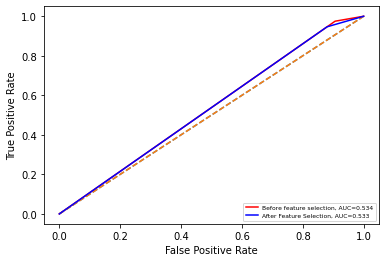

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={"Before feature selection": 'r-',
        "After Feature Selection": 'b-',
        }
for key in test.keys():
    fpr, tpr, thresholds = roc_curve(test[key], predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label = "{}, AUC={:.3f}".format(key, roc_auc_score(test[key],predicts[key])))
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    name = 'ROC curve for '+key
    plt.legend(prop={'size':6}, loc='lower right')
#     pyplot.title(name)